# Diabetes class prediction


1. [Exploración de los datos](#Exploración-de-los-datos)
2. [Algoritmos ML](#Algoritmos-ML)
3. [Discusión](#Discusión)


## EDA

Let's import all the libraries and load the dataset.

In [1]:
# Import libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [2]:
# Load data
diabetes = pd.read_csv("C:/Users/alexa/oneDrive/Documents/Code/Python/Projects/Diabetes/diabetes/Multiclass Diabetes Dataset/Multiclass Diabetes Dataset.csv")

# Save predictors and target on different datasets
x = diabetes.drop(columns = ['Class'])
y = diabetes[['Class']]

# Check missing data
x.shape
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 22.8 KB


In [3]:
x.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0


In [4]:
x.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000
10%,0.000000,33.000000,2.700000,35.000000,4.030000,3.200000,0.900000,0.750000,1.300000,0.500000,21.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000
90%,1.000000,60.000000,9.040000,125.100000,10.800000,6.200000,3.900000,1.700000,3.800000,1.870000,33.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000


We observe that the range of some of these variables are quite broad. This means that it will be interesting to normalize this data in order to implement Neural Networks, k-NN or SVMs, since these algorithms are quite sensible to the magnitudes of each features.

Before that, let's take a look at our data!

<function matplotlib.pyplot.show(close=None, block=None)>

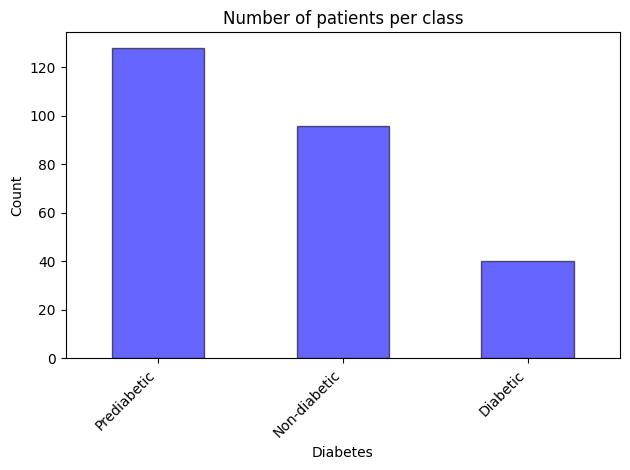

In [5]:
value_mapping = {0: 'Non-diabetic', 1: 'Diabetic', 2:'Prediabetic'}
diabetes['Class'] = diabetes['Class'].replace(value_mapping)
value_mapping2 = {0: 'Female', 1: 'Male'}
diabetes['Gender'] = diabetes['Gender'].replace(value_mapping2)

counts = diabetes['Class'].value_counts()
# Plot
plt.figure()
counts.plot(kind='bar', 
            stacked=True, 
            color='blue',
            edgecolor='black',
            alpha = 0.6)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Number of patients per class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

We can see that most of our patients in the dataset are pre-diabetic, whereas the diabetic class is the less common. This inbalance might affect the model's performance, however, it is not too problematic. We will check again when assessing the models performance!

Let's check if there is any difference in Gender

<function matplotlib.pyplot.show(close=None, block=None)>

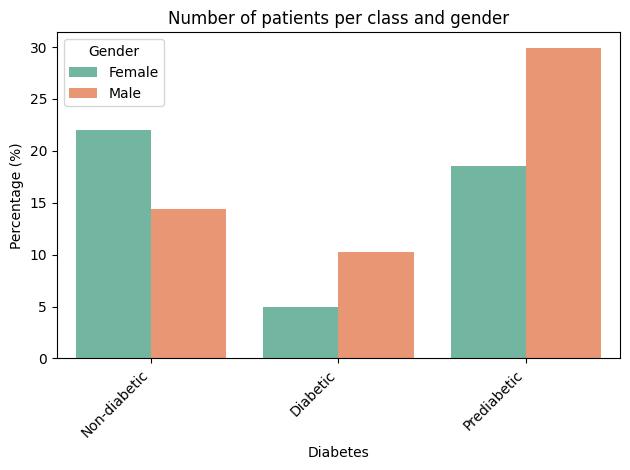

In [6]:
plt.figure()
sns.countplot(data=diabetes, x='Class', hue='Gender',
              stat = 'percent',palette = "Set2")
plt.xlabel('Diabetes')
plt.ylabel('Percentage (%)')
plt.title('Number of patients per class and gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

We can also observe that most of the patients that are either prediabetic or diabetic are males. Most of the healthy patients are women. Let's check the distribution of these 3 classess in the rest of numerical variables!

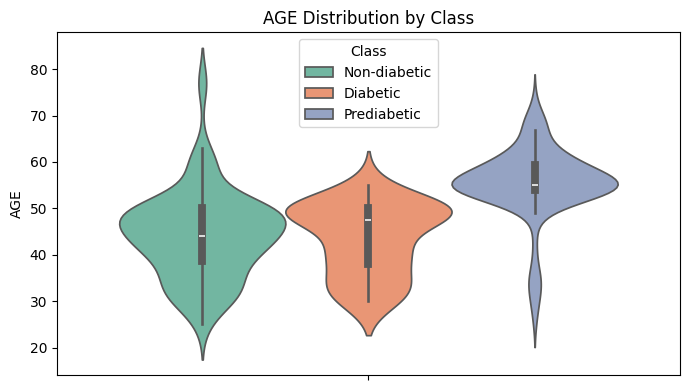

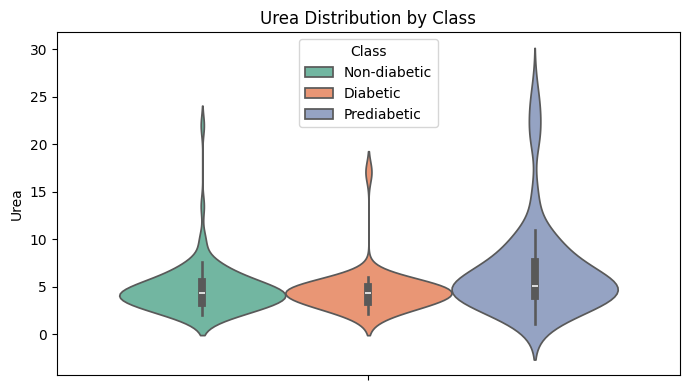

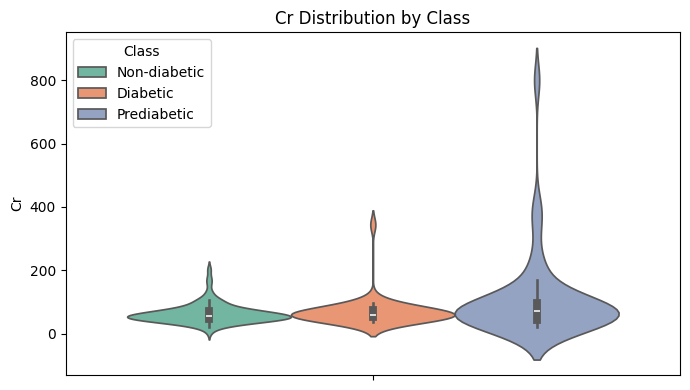

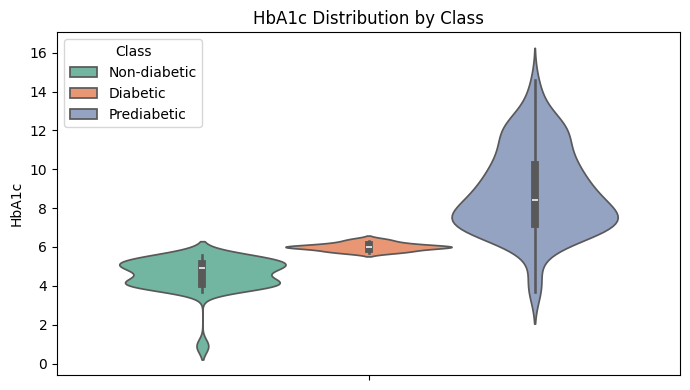

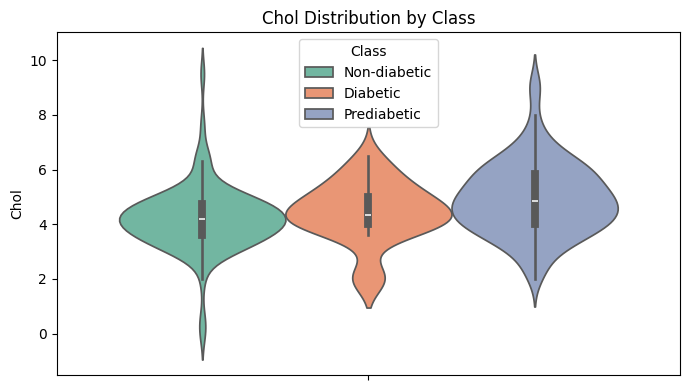

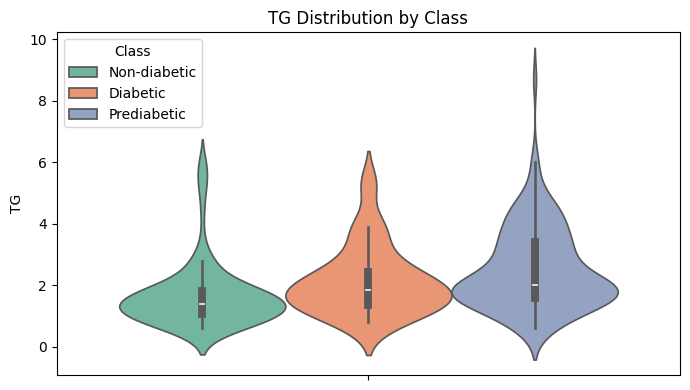

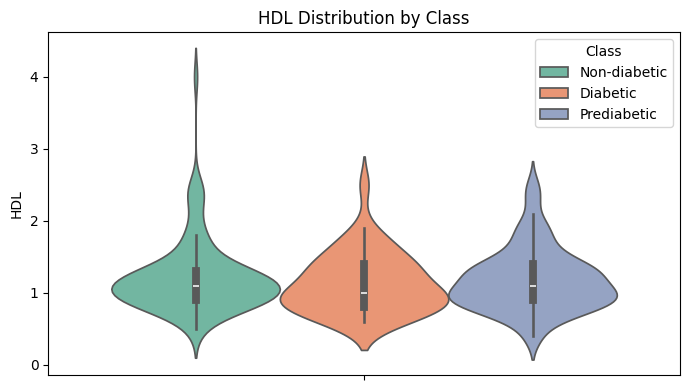

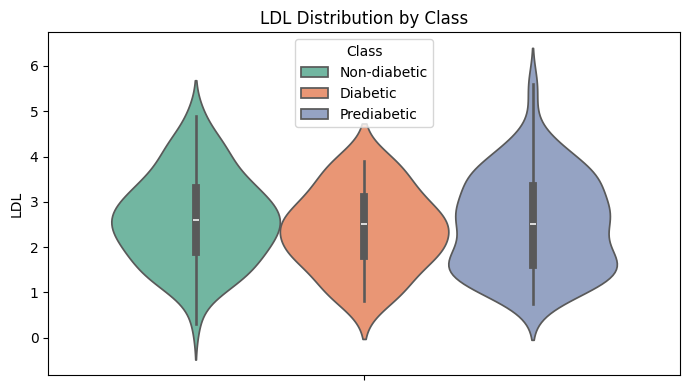

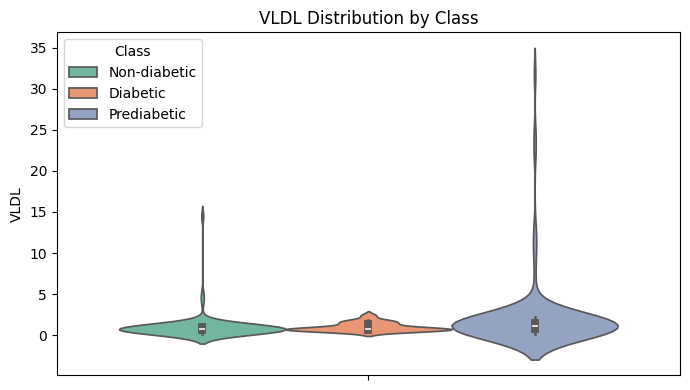

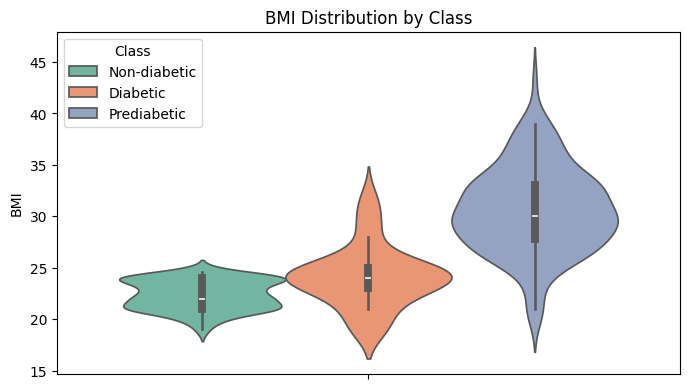

In [7]:
num_vars = diabetes.select_dtypes(include=['int64','float64']).columns
#num_vars = num_vars.drop(['Class','Gender'])
for feature in num_vars:
    plt.figure(figsize=(7, 4))
    sns.violinplot(data=diabetes, hue='Class', y=feature, palette="Set2")
    plt.title(f"{feature} Distribution by Class")
    plt.tight_layout()
    plt.show()

We see that in the diabetic patients have higher HbA1c values, are older and with a higher BMI. Let's check if there are any correlations between the variables.

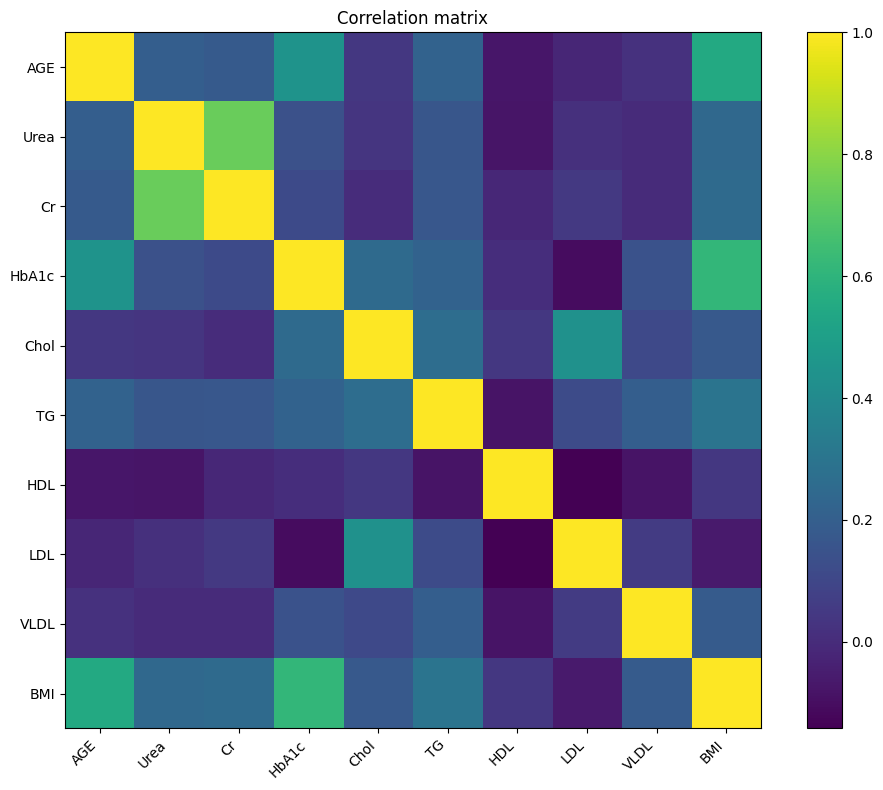

In [8]:
# Correlation matrix
corr = diabetes[num_vars].corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr.values)
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.index)
plt.title('Correlation matrix')
plt.colorbar(im)
plt.tight_layout()
plt.show()

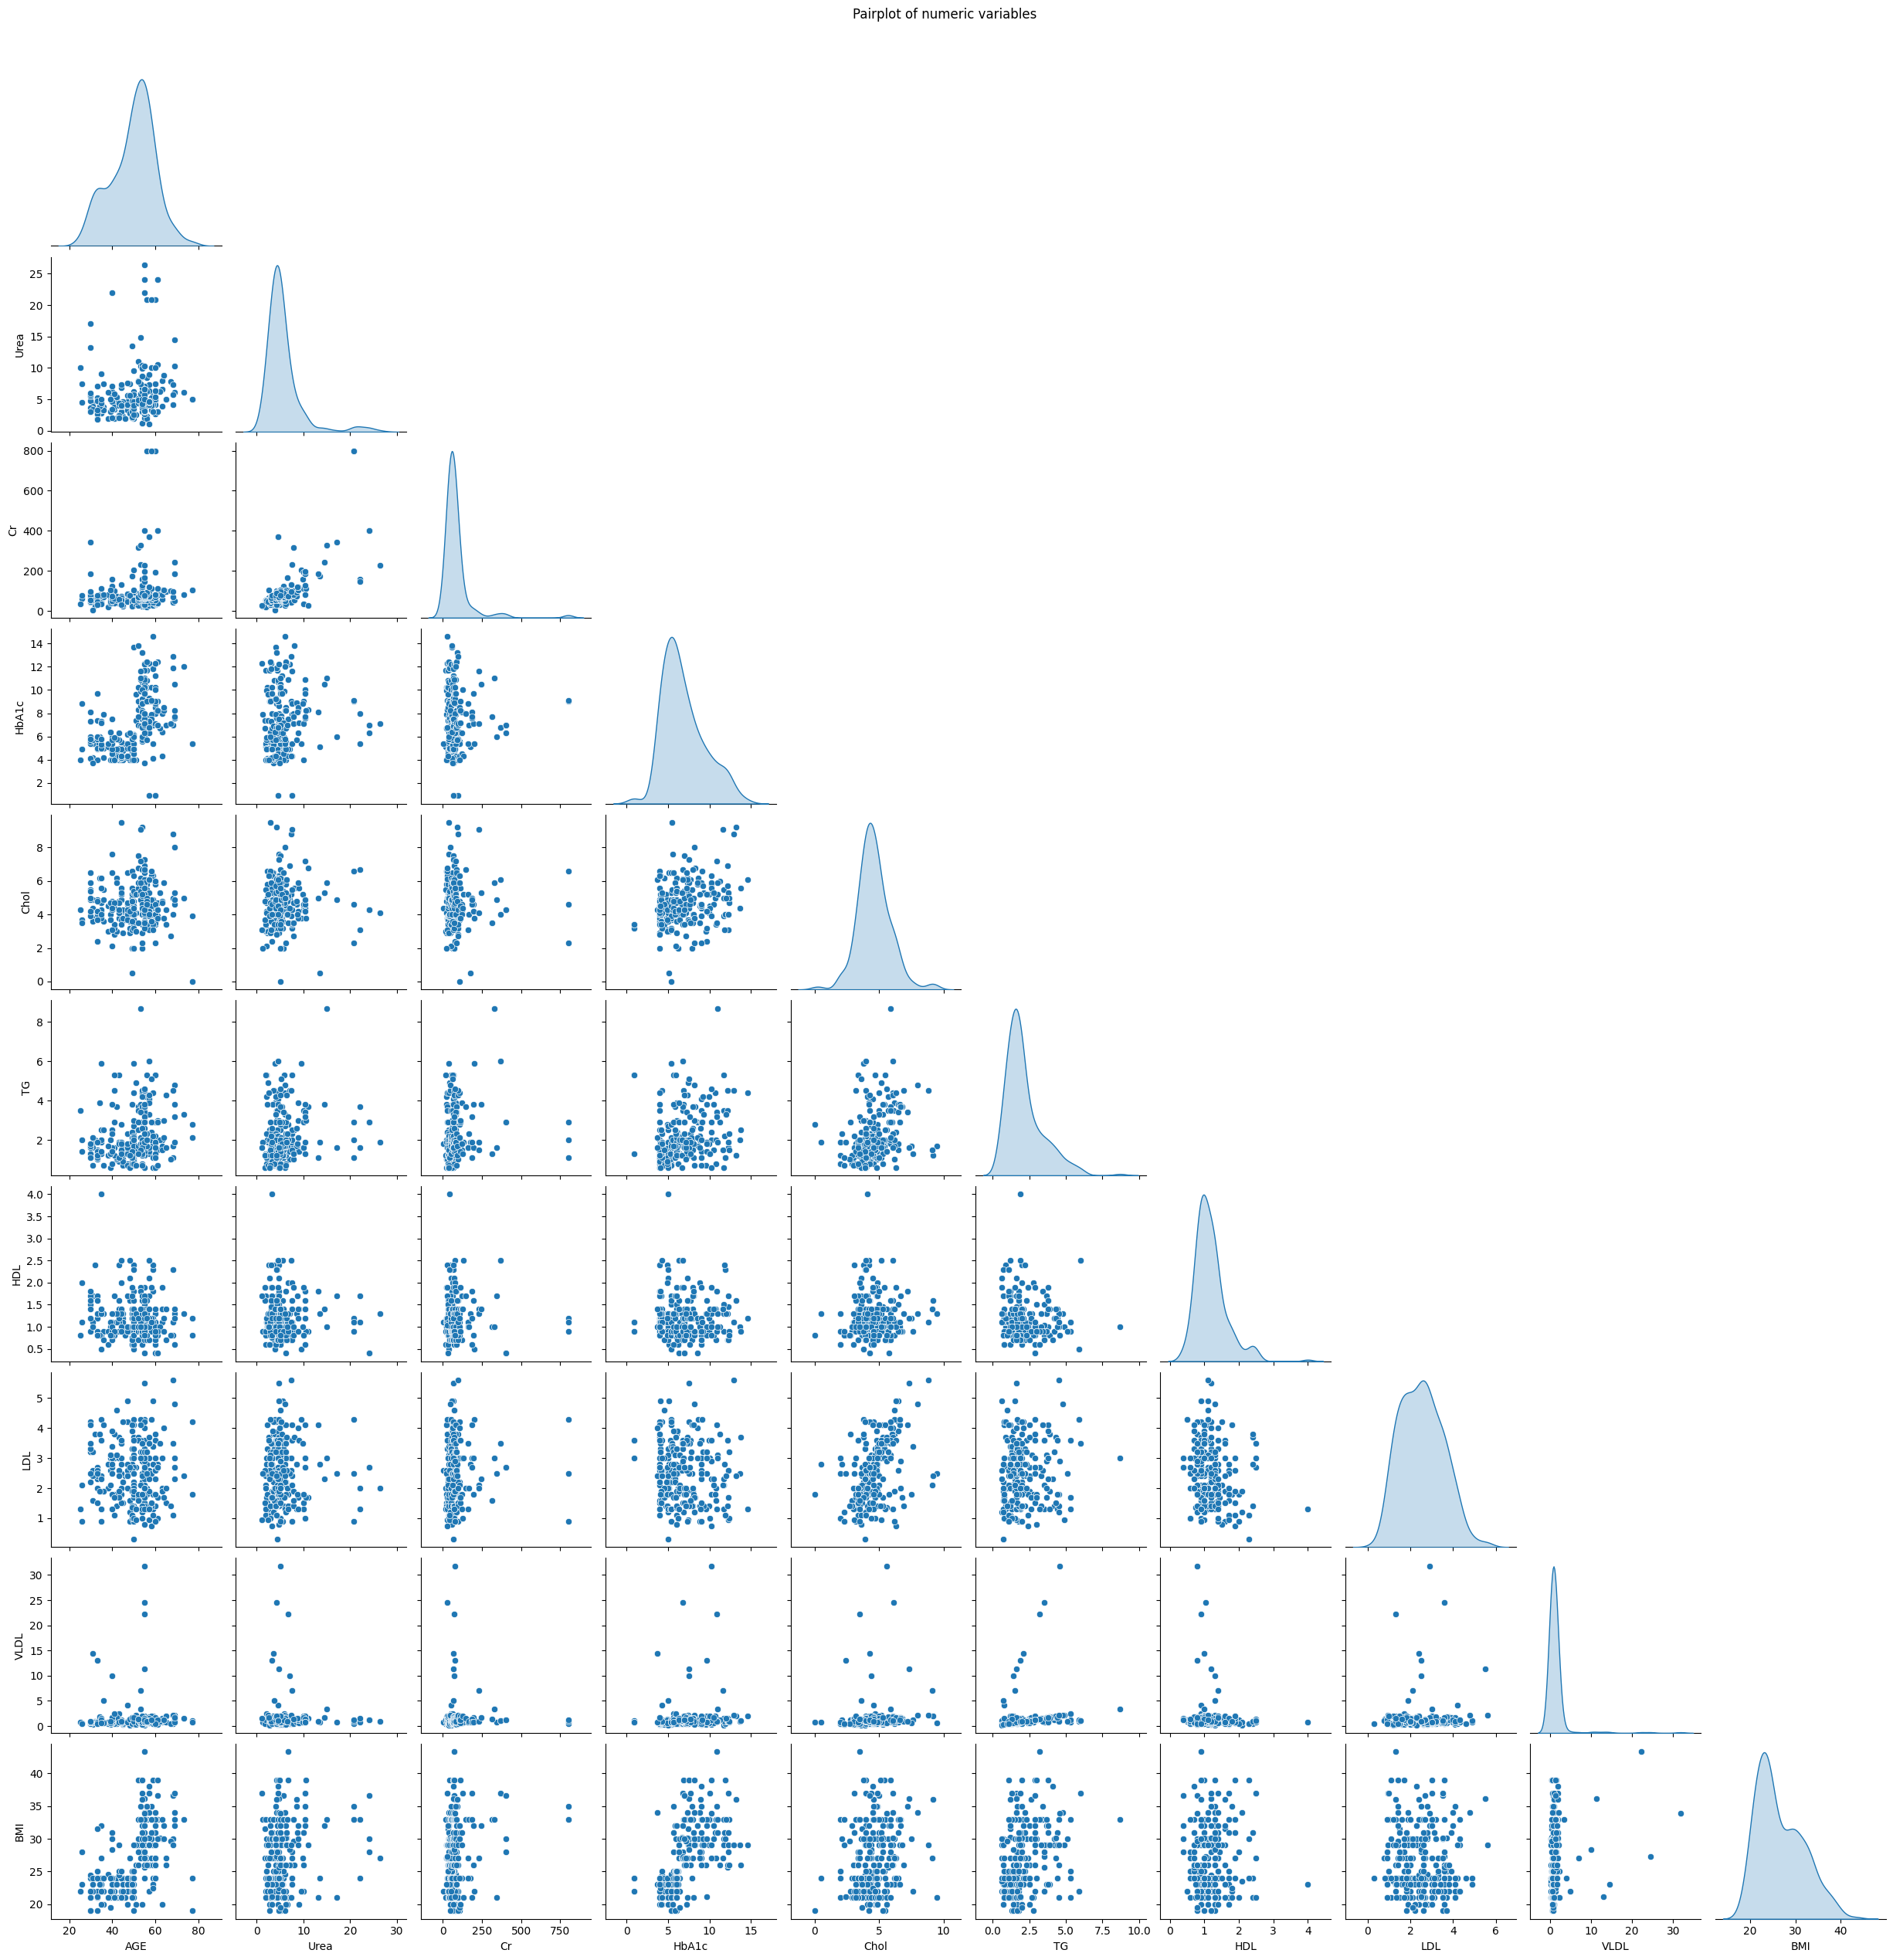

In [9]:
sns.pairplot(diabetes[num_vars], diag_kind="kde", corner=True)  
plt.suptitle("Pairplot of numeric variables", y=1.02)
plt.show()

## Scale data

Let's scale the variables using a min-max function. This will improve some algorithm's performance! For this project, we can perform the min-max function for normalization, which will take the full range of a variable and convert it to a range between 0 and 1.

In [10]:
# Normalizamos los datos con min-max

for column in x.columns:                                    # Para cada columna
    col_min = x[column].min()                               # Recogemos el valor mínimo
    col_max = x[column].max()                               # Y máximo
    x[column] = (x[column] - col_min) / (col_max - col_min) # Realizamos la normalziación

x.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,0.471591,0.180692,0.100512,0.435236,0.483620,0.191592,0.217466,0.420919,0.040480,0.314510
std,0.498875,0.194756,0.158215,0.125189,0.185737,0.135691,0.156277,0.126553,0.188712,0.098097,0.210047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.153846,0.063241,0.036524,0.228467,0.336842,0.037037,0.097222,0.188679,0.009494,0.082474
25%,0.000000,0.346154,0.098814,0.050378,0.299270,0.407895,0.086420,0.138889,0.283019,0.015032,0.164948
50%,1.000000,0.480769,0.142292,0.069270,0.379562,0.473684,0.148148,0.194444,0.415094,0.022152,0.247423
75%,1.000000,0.581731,0.197628,0.096033,0.532847,0.557895,0.262346,0.256944,0.547170,0.034810,0.453608
90%,1.000000,0.673077,0.313834,0.150000,0.722628,0.652632,0.407407,0.361111,0.660377,0.052848,0.577320
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observamos que el número de clases de distribuye de forma uniforme, lo cual facilita el proceso de separación de los datos en train y test.

## Split test-training

Let's split our data in the train and test datasets!

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.33,
                                                    random_state=12345,
                                                    stratify=y)

print('xtrain shape: ', x_train.shape)
print('ytrain shape: ', y_train.shape)
print('xtest shape: ', x_test.shape)
print('ytest shape: ', y_test.shape)

xtrain shape:  (176, 11)
ytrain shape:  (176, 1)
xtest shape:  (88, 11)
ytest shape:  (88, 1)


## Machine Learning Algorithms

Now that we have everything ready, let's build the models!

### k-Nearest Neighbours

Classification Report k= 1 :


c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


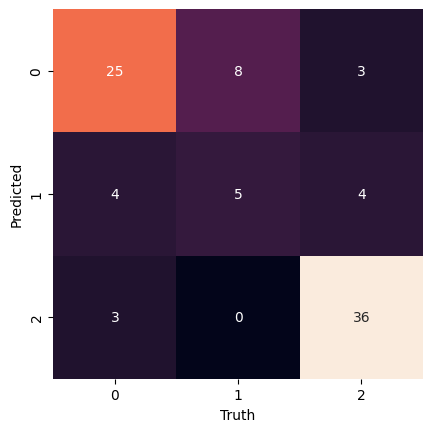

              precision    recall  f1-score   support

           0       0.69      0.78      0.74        32
           1       0.38      0.38      0.38        13
           2       0.92      0.84      0.88        43

    accuracy                           0.75        88
   macro avg       0.67      0.67      0.67        88
weighted avg       0.76      0.75      0.75        88

Classification Report k= 3 :


c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


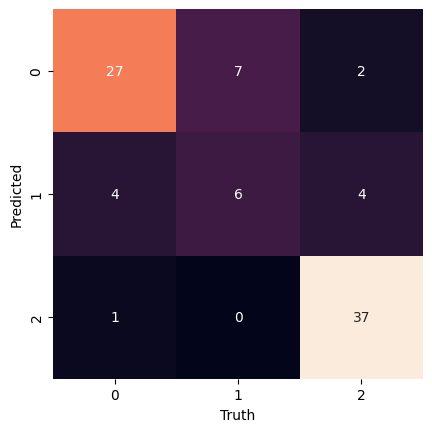

c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.75      0.84      0.79        32
           1       0.43      0.46      0.44        13
           2       0.97      0.86      0.91        43

    accuracy                           0.80        88
   macro avg       0.72      0.72      0.72        88
weighted avg       0.81      0.80      0.80        88

Classification Report k= 5 :


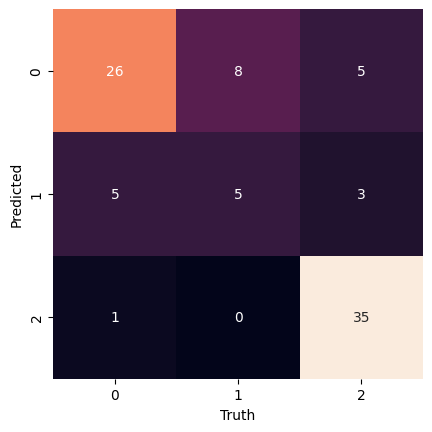

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        32
           1       0.38      0.38      0.38        13
           2       0.97      0.81      0.89        43

    accuracy                           0.75        88
   macro avg       0.67      0.67      0.67        88
weighted avg       0.77      0.75      0.76        88

Classification Report k= 7 :


c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


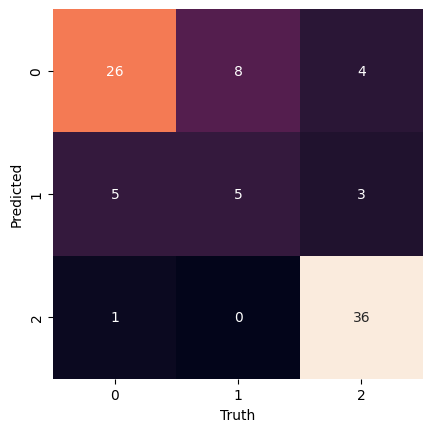

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        32
           1       0.38      0.38      0.38        13
           2       0.97      0.84      0.90        43

    accuracy                           0.76        88
   macro avg       0.68      0.68      0.68        88
weighted avg       0.78      0.76      0.77        88

Classification Report k= 11 :


c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


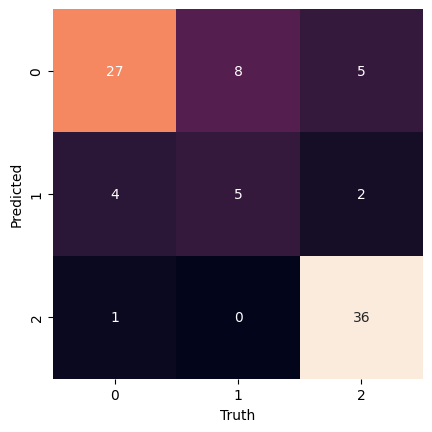

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        32
           1       0.45      0.38      0.42        13
           2       0.97      0.84      0.90        43

    accuracy                           0.77        88
   macro avg       0.70      0.69      0.69        88
weighted avg       0.79      0.77      0.77        88



In [12]:
# Dictionary to store the results for each k
scores_kNN = {}

# Let's test a few k values
k_values = [1,3,5,7,11]
for k in k_values:                                            
    classifier = KNeighborsClassifier(n_neighbors=k)                    # Initialize     
    classifier.fit(x_train, y_train)                                    # Fit                    
    pred = classifier.predict(x_test)                                   # Predict                        
    scores_kNN[k] = metrics.accuracy_score(y_test,pred)                      
    names = np.unique(pred)
    mat = confusion_matrix(pred, y_test)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
    plt.xlabel('Truth')
    plt.ylabel('Predicted')                                   
    result1 = metrics.classification_report(y_test, pred)     
    print("Classification Report k=",k,":")
    plt.show()
    print(result1)

In [13]:
scores_kNN

{1: 0.75,
 3: 0.7954545454545454,
 5: 0.75,
 7: 0.7613636363636364,
 11: 0.7727272727272727}

Apprently, the best accuracy result was por k = 3 with almost a 80%. Let's keep that model and move on the the next one.

c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report k= 3


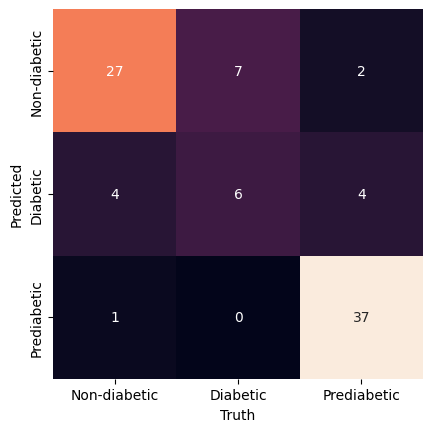

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        32
           1       0.43      0.46      0.44        13
           2       0.97      0.86      0.91        43

    accuracy                           0.80        88
   macro avg       0.72      0.72      0.72        88
weighted avg       0.81      0.80      0.80        88



In [ ]:
scores = {}

classifier = KNeighborsClassifier(n_neighbors=3)                   
classifier.fit(x_train, y_train)                                                     
pred = classifier.predict(x_test)
scores['k-NN (k = 3)'] = metrics.accuracy_score(y_test,pred)                                                     
mat = confusion_matrix(pred, y_test)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'], 
        yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.xlabel('Truth')
plt.ylabel('Predicted')                                   
result1 = metrics.classification_report(y_test, pred)     
print("Classification Report k= 3")
plt.show()
print(result1)

### Naive Bayes

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       1.00      0.77      0.87        13
           2       0.93      0.93      0.93        43

    accuracy                           0.91        88
   macro avg       0.93      0.88      0.90        88
weighted avg       0.91      0.91      0.91        88



c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


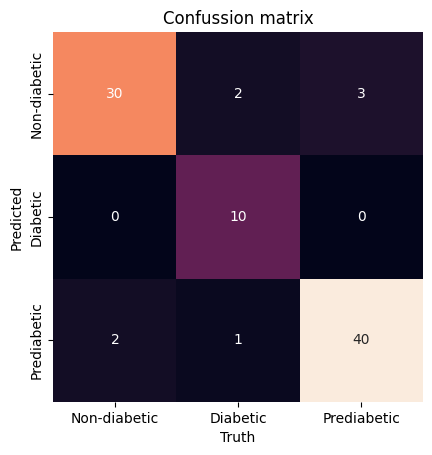

<Figure size 800x600 with 0 Axes>

In [15]:
model = GaussianNB()
model.fit(x_train, y_train)
GaussianNB(var_smoothing=1e-09)
y_pred = model.predict(x_test)

mat = confusion_matrix(y_pred, y_test)
scores['Naïve Bayes'] = metrics.accuracy_score(y_test,pred)    
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'], 
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.title('Confussion matrix')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.figure(figsize=(8, 6))

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:","\n")
print (result)

plt.show()

### Artificial Neural Network


Let's create a couple of ANNs. The first one will consist of a single hidden layer, with 15 neurons, and ReLu activation. The final layer will only have 3 neurons, one per class, with a soft-max activation function, which is convenient for multiclass classifications!

c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 - 1s - 124ms/step - accuracy: 0.4500 - loss: 1.0560 - val_accuracy: 0.5556 - val_loss: 1.0357
Epoch 2/50
5/5 - 0s - 24ms/step - accuracy: 0.4500 - loss: 1.0386 - val_accuracy: 0.5556 - val_loss: 1.0166
Epoch 3/50
5/5 - 0s - 21ms/step - accuracy: 0.4929 - loss: 1.0232 - val_accuracy: 0.5278 - val_loss: 0.9989
Epoch 4/50
5/5 - 0s - 21ms/step - accuracy: 0.4929 - loss: 1.0087 - val_accuracy: 0.5278 - val_loss: 0.9827
Epoch 5/50
5/5 - 0s - 20ms/step - accuracy: 0.4857 - loss: 0.9953 - val_accuracy: 0.5278 - val_loss: 0.9672
Epoch 6/50
5/5 - 0s - 21ms/step - accuracy: 0.4857 - loss: 0.9829 - val_accuracy: 0.5278 - val_loss: 0.9521
Epoch 7/50
5/5 - 0s - 20ms/step - accuracy: 0.4857 - loss: 0.9713 - val_accuracy: 0.5278 - val_loss: 0.9375
Epoch 8/50
5/5 - 0s - 17ms/step - accuracy: 0.4929 - loss: 0.9600 - val_accuracy: 0.5556 - val_loss: 0.9239
Epoch 9/50
5/5 - 0s - 15ms/step - accuracy: 0.4929 - loss: 0.9498 - val_accuracy: 0.5278 - val_loss: 0.9110
Epoch 10/50
5/5 - 0s - 16ms

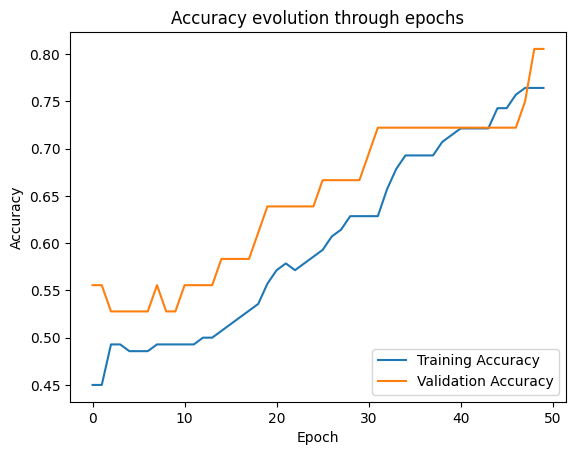

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000147A2619620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


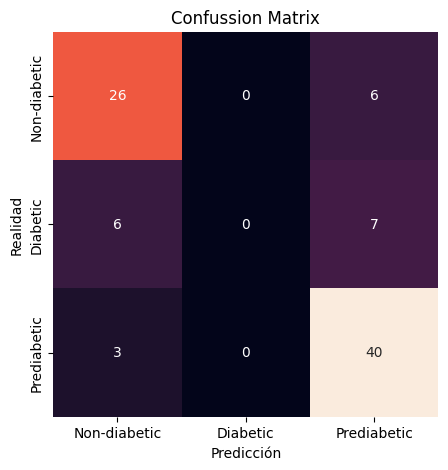

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.00      0.00      0.00        13
           2       0.75      0.93      0.83        43

    accuracy                           0.75        88
   macro avg       0.50      0.58      0.54        88
weighted avg       0.64      0.75      0.69        88



c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

np.random.seed(12345)
tf.random.set_seed(12345)

num_features = x_train.shape[1]
num_classes = len(np.unique(y_train))

# Model
model_ANN = Sequential()
model_ANN.add(Dense(15, activation='relu', input_dim=num_features))
model_ANN.add(Dense(num_classes, activation='softmax'))

model_ANN.summary()
model_ANN.compile(optimizer="adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_ANN.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=2)

# Learning curve plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(loc='lower right')
plt.title('Accuracy evolution through epochs')
plt.show()

# Predict
pred_prob = model_ANN.predict(x_test)
pred = np.argmax(pred_prob, axis=1)

# Confussion Matrix
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'], 
        yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.title('Confussion Matrix')
plt.xlabel('Predicción'); plt.ylabel('Realidad')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, pred))


Etiquetas únicas en y (global): [0 1 2]
Distribución clases:
Train: Counter({np.int64(2): 81, np.int64(0): 61, np.int64(1): 26})
Val:   Counter({np.int64(2): 21, np.int64(0): 16, np.int64(1): 6})
Test:  Counter({np.int64(2): 26, np.int64(0): 19, np.int64(1): 8})
class_weight: {np.int64(0): np.float64(0.9180327868852459), np.int64(1): np.float64(2.1538461538461537), np.int64(2): np.float64(0.691358024691358)}
Epoch 1/300


c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 - 2s - 319ms/step - accuracy: 0.3095 - loss: 1.7131 - val_accuracy: 0.3721 - val_loss: 1.0942 - learning_rate: 1.0000e-03
Epoch 2/300
6/6 - 0s - 17ms/step - accuracy: 0.4107 - loss: 1.4246 - val_accuracy: 0.4651 - val_loss: 1.0798 - learning_rate: 1.0000e-03
Epoch 3/300
6/6 - 0s - 16ms/step - accuracy: 0.5119 - loss: 1.2118 - val_accuracy: 0.4884 - val_loss: 1.0657 - learning_rate: 1.0000e-03
Epoch 4/300
6/6 - 0s - 16ms/step - accuracy: 0.5536 - loss: 1.0847 - val_accuracy: 0.4884 - val_loss: 1.0520 - learning_rate: 1.0000e-03
Epoch 5/300
6/6 - 0s - 17ms/step - accuracy: 0.5893 - loss: 1.0655 - val_accuracy: 0.4884 - val_loss: 1.0375 - learning_rate: 1.0000e-03
Epoch 6/300
6/6 - 0s - 18ms/step - accuracy: 0.6548 - loss: 0.9703 - val_accuracy: 0.4884 - val_loss: 1.0238 - learning_rate: 1.0000e-03
Epoch 7/300
6/6 - 0s - 18ms/step - accuracy: 0.6667 - loss: 1.0488 - val_accuracy: 0.4884 - val_loss: 1.0134 - learning_rate: 1.0000e-03
Epoch 8/300
6/6 - 0s - 19ms/step - accuracy: 0.7500 

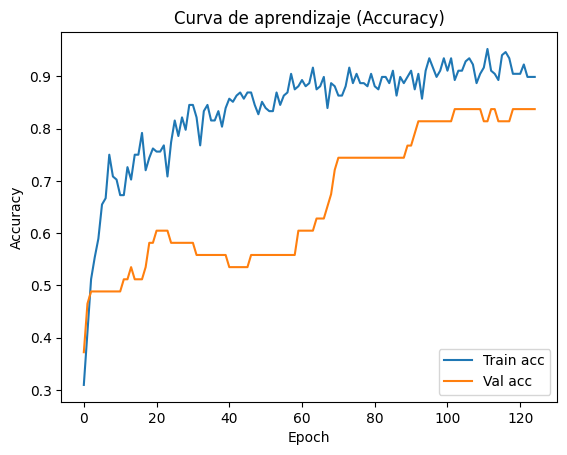

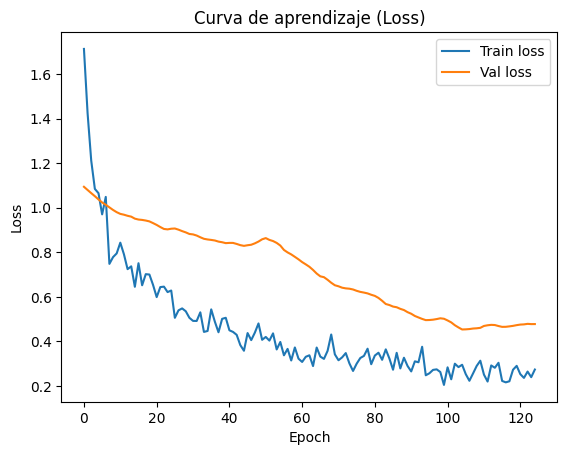

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


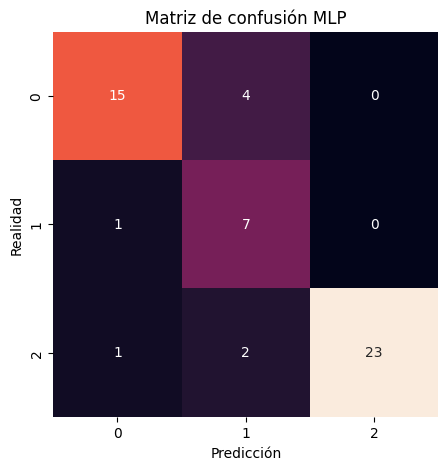

Classification Report (test):

              precision    recall  f1-score   support

           0      0.882     0.789     0.833        19
           1      0.538     0.875     0.667         8
           2      1.000     0.885     0.939        26

    accuracy                          0.849        53
   macro avg      0.807     0.850     0.813        53
weighted avg      0.888     0.849     0.860        53

Macro F1 (test): 0.813


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

np.random.seed(12345)
tf.random.set_seed(12345)

y = np.asarray(y)
if y.ndim > 1:
    y = y.ravel()

# A entero (o codifica si son strings)
if not np.issubdtype(y.dtype, np.integer):
    try:
        y = y.astype(int)
    except Exception:
        le = LabelEncoder()
        y = le.fit_transform(y)

print("Etiquetas únicas en y (global):", np.unique(y))

# ==== Split estratificado ====
X_tr_full, X_te, y_tr_full, y_te = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=12345
)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_tr_full, y_tr_full, test_size=0.2, stratify=y_tr_full, random_state=12345
)

print("Distribución clases:")
print("Train:", Counter(y_tr))
print("Val:  ", Counter(y_val))
print("Test: ", Counter(y_te))

# ==== Escalado Min-Max (fit SOLO en train) ====
scaler = MinMaxScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)
X_te  = scaler.transform(X_te)

# ==== class_weight (explícito para 0,1,2) ====
all_classes = np.array([0, 1, 2], dtype=int)  # <- evita el ValueError
# (si tu problema tuviera otras etiquetas, ajústalo aquí)
weights = compute_class_weight(class_weight='balanced', classes=all_classes, y=y_tr)
class_weight = dict(zip(all_classes, weights))
print("class_weight:", class_weight)

# ==== Modelo (más capaz + regularización) ====
num_features = X_tr.shape[1]
num_classes = len(all_classes)

model = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,),
          kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.35),

    Dense(64, activation='relu',
          kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.35),

    Dense(32, activation='relu',
          kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.25),

    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cb = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-5, verbose=1)
]

history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=32,
    verbose=2,
    class_weight=class_weight,
    callbacks=cb
)

# ==== Curvas ====
plt.figure()
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(loc='lower right')
plt.title('Curva de aprendizaje (Accuracy)')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(loc='upper right')
plt.title('Curva de aprendizaje (Loss)')
plt.show()

# ==== Evaluación ====
pred_prob = model.predict(X_te)
pred = np.argmax(pred_prob, axis=1)

cm = confusion_matrix(y_te, pred, labels=all_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[str(c) for c in all_classes],
            yticklabels=[str(c) for c in all_classes])
plt.title('Matriz de confusión MLP')
plt.xlabel('Predicción'); plt.ylabel('Realidad')
plt.show()

print("Classification Report (test):\n")
print(classification_report(y_te, pred, target_names=[str(c) for c in all_classes], digits=3))

macro_f1 = f1_score(y_te, pred, average='macro')
print(f"Macro F1 (test): {macro_f1:.3f}")


### Support Vector Machine

Antes de trabajar con el algoritmo SVC, en Python es necesario que convirtamos nuestros datos a Arrays de NumPy.

In [18]:
# Convertimos los conjuntos de datos a un array NumPy
x_test_svm = np.array(x_test)
y_test_svm = np.array(y_test)
x_train_svm = np.array(x_test)
y_train_svm = np.array(y_test)

#### Kernel lineal


 Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        32
           1       0.00      0.00      0.00        13
           2       1.00      0.86      0.93        43

    accuracy                           0.78        88
   macro avg       0.54      0.62      0.57        88
weighted avg       0.72      0.78      0.73        88



c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[

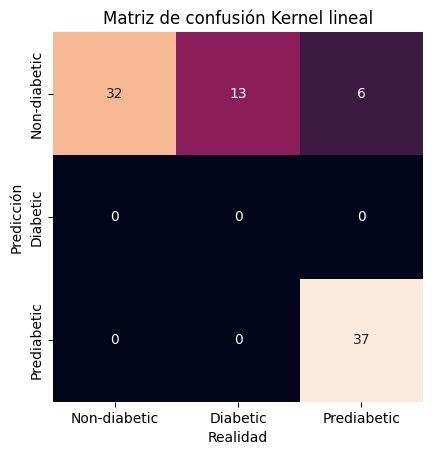

<Figure size 800x600 with 0 Axes>

In [19]:
# Generamos el modelo SVC con Kernel lineal
modelo1 = SVC(kernel='linear')

# Ajustamos el modelo con los datos de entrenamiento
modelo1.fit(x_train_svm, y_train_svm)

# Definimos los parámetros del modelo
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Y predecimos con los datos de test
pred = modelo1.predict(x_test_svm)

scores['SVM (linealkernel)'] = metrics.accuracy_score(y_test_svm,pred)   

# Obtenemos la matriz de confusión
mat = confusion_matrix(pred, y_test_svm)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'], 
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.title('Matriz de confusión Kernel lineal')
plt.xlabel('Realidad')
plt.ylabel('Predicción')
plt.figure(figsize=(8, 6))

result = metrics.classification_report(y_test_svm, pred)
print("\n","Classification Report:")
print (result)

#### Kernel RBF


 Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        32
           1       0.00      0.00      0.00        13
           2       1.00      0.88      0.94        43

    accuracy                           0.80        88
   macro avg       0.55      0.63      0.57        88
weighted avg       0.72      0.80      0.74        88



c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[

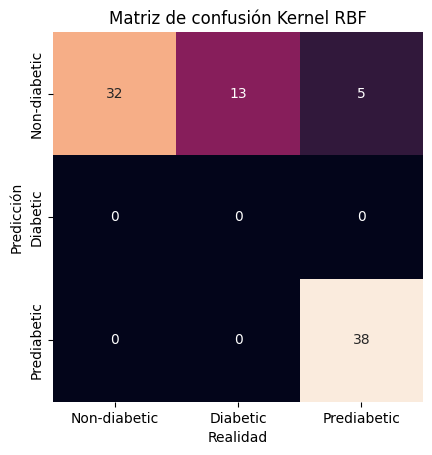

<Figure size 800x600 with 0 Axes>

In [20]:
# Repetimos el mismo ejercicio, esta vez, con un Kernel RBF
modelo2 = SVC(kernel='rbf')
modelo2.fit(x_train_svm, y_train_svm)
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
pred2 = modelo2.predict(x_test_svm)
scores['SVM (RBF kernel)'] = metrics.accuracy_score(y_test_svm,pred2) 
mat = confusion_matrix(pred2, y_test_svm)
names = np.unique(pred2)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'], 
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.title('Matriz de confusión Kernel RBF')
plt.xlabel('Realidad')
plt.ylabel('Predicción')
plt.figure(figsize=(8, 6))

result = metrics.classification_report(y_test_svm, pred2)
print("\n","Classification Report:")
print (result)

Tras los resultados obtenidos con el algoritmo SVC, parece que, al aplicar un Kernel lineal, la predicción de los datos es mucho más precisa que si se trata de un Kernel RBF. Esto probablemente será debido a que la estructura o disposición de los datos hacen que la aplicación de un Kernel lineal separe los grupos en clases de forma más eficientes que usando un Kernel RBF.

### Árbol de clasificación

#### Sin boosting

Classification Report: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.87      1.00      0.93        13
           2       1.00      0.93      0.96        43

    accuracy                           0.97        88
   macro avg       0.95      0.98      0.96        88
weighted avg       0.97      0.97      0.97        88



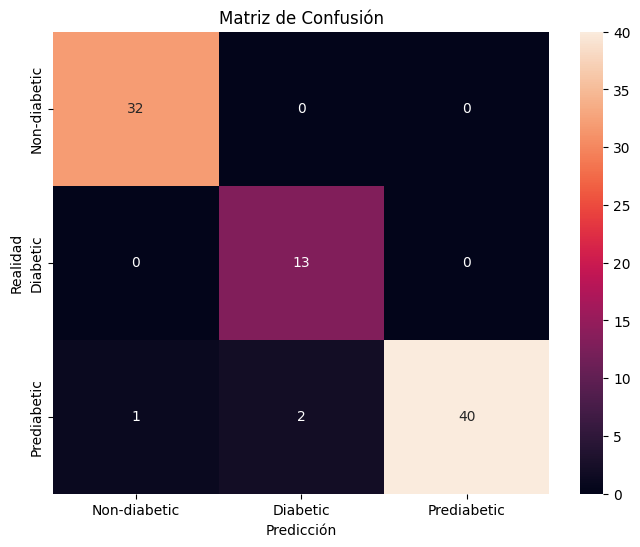

In [21]:
# Generamos el modelo, los ajustamos y lopredecimos
clf = DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

scores['SVM (Classification tree - no boosting)'] = metrics.accuracy_score(y_test,y_pred) 

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:","\n")
print (result)

plt.show()

#### Con boosting

Classification Report: 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.96        43

    accuracy                           0.97        88
   macro avg       0.96      0.98      0.97        88
weighted avg       0.97      0.97      0.97        88



c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


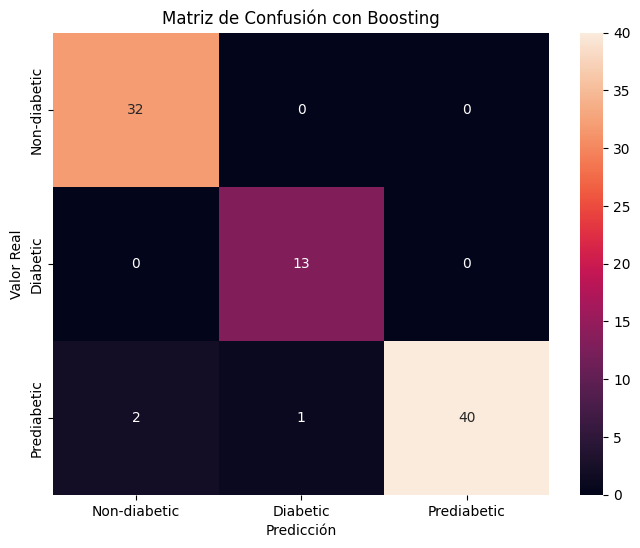

In [22]:
clas = DecisionTreeClassifier(random_state=42)

# Crear el clasificador AdaBoost, entrenarlo y predecir las clases
mod = AdaBoostClassifier(clas, n_estimators=50, random_state=42)
mod.fit(x_train, y_train)
y_pred = mod.predict(x_test)

scores['SVM (Classification tree - boosting)'] = metrics.accuracy_score(y_test,y_pred) 

# Calcular la matriz de confusión y reporte de métricaa
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Boosting')

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:","\n")
print (result)

plt.show()

En esta ocasioón, obtenemos resultamos muy similares. De hecho, las métricas mostradas por Python son idénticas. Sin embargo, al evaluar la matriz de confusión, parece que el algoritmo con Boosting predice correctamente un individuo de la clase CHF más que aquel sobre el cual no se aplica el boosting.

### Random forest

#### Random forest n=100

c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report: 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        43

    accuracy                           0.98        88
   macro avg       0.98      0.98      0.98        88
weighted avg       0.98      0.98      0.98        88



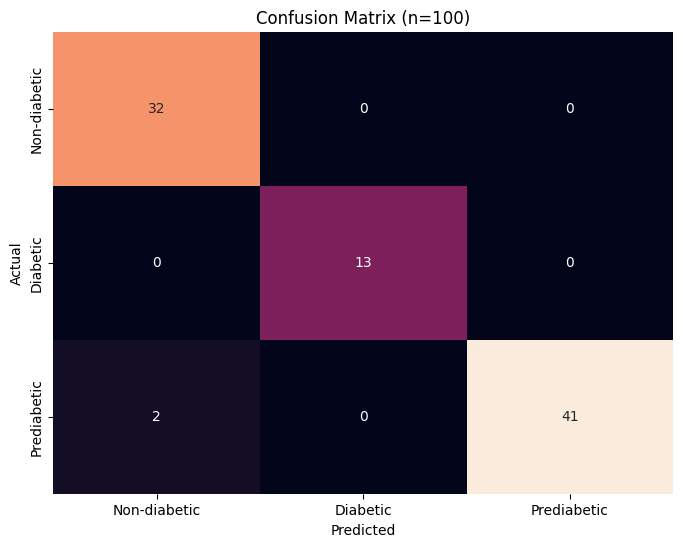

In [23]:
# Entrenar el modelo de Random Forest con n = 100 árboles, ajustar y predecir
rf_model_100 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_100.fit(x_train, y_train)
y_pred = rf_model_100.predict(x_test)

scores['Random Forest (n=100)'] = metrics.accuracy_score(y_test,y_pred) 
# Matriz de confusión
confusion_matrix_100 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_100, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'], 
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (n=100)')

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:","\n")
print (result)

plt.show()

#### Random forest n = 200

c:\Users\alexa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report: 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        43

    accuracy                           0.98        88
   macro avg       0.98      0.98      0.98        88
weighted avg       0.98      0.98      0.98        88



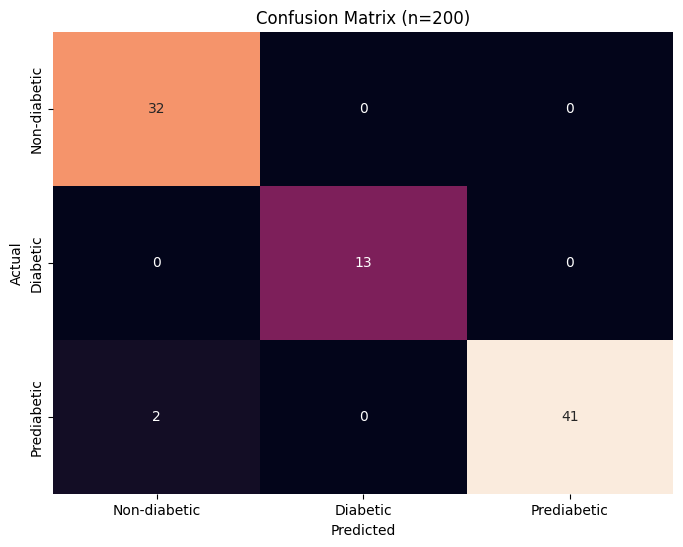

In [24]:
rf_model_200 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_200.fit(x_train, y_train)

y_pred = rf_model_200.predict(x_test)
confusion_matrix_200 = confusion_matrix(y_test, y_pred)
scores['Random Forest (n=200)'] = metrics.accuracy_score(y_test,y_pred) 

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_200, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'], 
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (n=200)')

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:","\n")
print (result)

plt.show()

Observando los resultados del Random Forest, de nuevo, en ambos casos obtenemos resultados muy similares, con una precisión del 99%. Al igual que pasaba anteriormente, al duplicar el número de árboles en nuestro algoritmo, no hay una diferencia significativa en las métricas, aunque parece que el algoritmo con n = 200 realiza una únca predicción mejor que el árbol n = 100 (para la clase CHF).

## Discusión

Una vez generados y evaluados todos los modelos, la decisión no parece estar clara. Hemos obtenido algunos algoritmos con unas métricas de precisión más bajas que otros, como es el caso del Naive Bayes el SVM con kernel RBF. Estos han sido los modelos que menor precisión han tenido, y aunque se podrían haber ajustado ligeralmente con algún parámetro, a priori podríamos descartarlos.

Estos dos modelos, además de tener una precisión muy baja, los valores de recall y f1-score para los grupos ARR y AFF son llamativamente bajos. Esto es una tendencia que se observa en general en todas los modelos planteados, incluso en los de una precisión más elevada. Por el contrario, todos los modelos parecen predecir muy bien la clase 'NSR' (Normal Sinus Rythm). Es decir, la mayoría de los algoritmos no realizan falsos negativos, y tienden a realizar falsos positivos (tomando como positivo tener una patología cardiaca). Es decir, por lo general, los algoritmos son bastante capaces de discernir entre pacientes con alguna patología o pacientes sanos, aunque son más propensos a equivocarse en la diagnosis de la patología exacta del paciente.

También cabe destacar que esto ha sido una exploración inicial de todos los modelos planteados, y que en ningún caso se ha realizado un tunning de los diferentes hiperparámetros de cada algoritmo, por lo que, en términos generales, podríamos mejorar los algoritmos probando diferentes hiperparámetros.

De todos los algoritmos testeados, destacan 2 por su precisión global: k-NN (k = 1) y el Random Forest (n = 200). Aunque la precisión de estos aloritmos sea la misma, no son iguales. Por ejemplo, el k-NN presenta un valor de recall para AFF de 0.97, frente a 0.95 del RF. Esto quiere decir que, para este grupo, el algoritmo k-NN tiene una mejor capacidad de identificar todos los positivos de AFF. Lo contrario ocurre para el grupo CHF (0.99 vs 1.00). Es decir, el algoritmo RF tiende a predecir peor la clase ARR, y lo confunde con AFF, principalmente, como se detecta en la martriz de confusión. Por su parte, el algoritmo k-NN lo "confunde" más con CHF.

En definitiva, elegir cuál de los dos algoritmos es mejor va a depender del contexto y de para qué requerimos el algoritmo. En el caso de querer usar este algoritmo para discernir pacientes sanos de enfermos, cualquiera de los dos valdría. En cambio, si lo que queremos es conocer el modelo e interpretarlo, probablemente sea más conveniente usar el modelo k-NN, dado que el RF puede considerarse más "opaco", aunque no tanto como otros algoritmos (ANN).




